****

# <center> <b> <span style="color:orange;"> African Institute for Mathematical Sciences RWANDA  </span> </b></center>

### <center> <b> <span style="color:green;">Assignment 2 : Numerical Linear Algebra (NLA) </span> </b></center>

### <left> <b> <span style="color:blue;">Presented by : </span> </b></left>  Manuella Kristeva NAKAM YOPDUP

<h2>Exercise 1</h2>

<p>Write a nonrecursive algorithm in the spirit of row-oriented forward substitution that implements column-oriented forward substitution. Use a single array that contains \( b \) initially, stores intermediate results (e.g. \( \hat{b}, \tilde{b} \)) during the computation, and contains \( y \) at the end. Use your algorithm to write a Julia program that solves the system \( Ax = b \) where</p>


A = \begin{pmatrix}
5 & 0 & 0 \\
2 & -4 & 0 \\
1 & 2 & 3
\end{pmatrix}
b = \begin{pmatrix}
-15 \\
-2 \\
10
\end{pmatrix}


In [17]:
function Col_Oriented_Forward_Substitution(A, b)
    n = size(A, 1)
    is_leading_zeros = true
    
    for j in 1:n
        if (b[j] == 0) && (is_leading_zeros)
            continue
        else
            b[j] = b[j]/ A[j,j]
            for i in (j+1):n
                b[i] -= A[i, j] * b[j]  # Update b[i] by adding A[i, j] * x[j]
            end
        end
        #b[j] = b[j] / A[j,j]
        is_leading_zeros = false
    end
    return b
end



Col_Oriented_Forward_Substitution (generic function with 1 method)

In [26]:
A = [5 0 0; 2 -4 0; 1 2 3]
b = [-15 -2 10]'

Col_Oriented_Forward_Substitution(A, b)

3×1 adjoint(::Matrix{Int64}) with eltype Int64:
 -3
 -1
  5

In [28]:
#Let us verify by using Julia built-in
A = [5 0 0; 2 -4 0; 1 2 3]
b = [-15 -2 10]'

x = A\b

3×1 Matrix{Float64}:
 -3.0
 -1.0
  5.0

# Exercise 2

<p> Consider a system of \( n \) carts connected by springs, as shown in Figure 1. The \( i \)-th spring has a stiffness of \( k_i \) newtons/meter. Suppose that the carts are subjected to steady forces of \( f_1, f_2, \ldots, f_n \) newtons, respectively, causing displacements of \( x_1, x_2, \ldots, x_n \) meters, respectively. </p>

<p> b- Compute the solution in the case \( n = 20 \), \( k_i = 1 \) newton/meter for all \( i \), and \( f_i = 0 \) except for \( f_5 = 1 \) newton and \( f_{16} = -1 \) newton. (Install ToeplitzMatrices to learn an easy way to enter the coefficient matrix in Julia.) </p>


In [54]:
using Pkg
Pkg.add("ToeplitzMatrices")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed IntelOpenMP_jll ── v2024.2.1+0
   Installed oneTBB_jll ─────── v2021.12.0+0
   Installed StaticArraysCore ─ v1.4.3
   Installed FFTW ───────────── v1.8.0
   Installed SpecialFunctions ─ v2.4.0
   Installed DSP ────────────── v0.7.10
   Installed Polynomials ────── v4.0.11
   Installed MKL_jll ────────── v2024.2.0+0
   Installed PDMats ─────────── v0.11.31
   Installed FFTW_jll ───────── v3.3.10+1
   Installed Setfield ───────── v1.1.1
   Installed AbstractFFTs ───── v1.5.0
   Installed OpenSpecFun_jll ── v0.5.5+0
   Installed IterTools ──────── v1.10.0
   Installed Libiconv_jll ───── v1.17.0+1
   Installed ToeplitzMatrices ─ v0.8.4
   Installed FillArrays ─────── v1.13.0
    Updating `~/.julia/environments/v1.8/Project.toml`
  [c751599d] + ToeplitzMatrices v0.8.4
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [621f4979] + AbstractFFTs v1.5.0
  [717857b8] + DSP v0.7.10
  

In [16]:
using LinearAlgebra, ToeplitzMatrices

# Define parameters
n = 20
k = 1.0
f = zeros(n)
f[5] = 1.0
f[16] = -1.0

# Construct the tridiagonal matrix A
main_diag = fill(2 * k, n)
off_diag = fill(-k, n-1)
A = SymTridiagonal(main_diag, off_diag)
display(A)
# Solve the system Ax = b
x = A \ f

println("\nLa solution est : \n")
display(x)


20×20 SymTridiagonal{Float64, Vector{Float64}}:
  2.0  -1.0    ⋅     ⋅     ⋅     ⋅   …    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
 -1.0   2.0  -1.0    ⋅     ⋅     ⋅        ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅   -1.0   2.0  -1.0    ⋅     ⋅        ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅   -1.0   2.0  -1.0    ⋅        ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅   -1.0   2.0  -1.0       ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅   -1.0   2.0  …    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅   -1.0       ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅        ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅        ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅        ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅   …    ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅        ⋅     ⋅     ⋅     ⋅     ⋅     ⋅ 
   ⋅     ⋅     ⋅     ⋅     ⋅     ⋅        ⋅     ⋅   


La solution est : 



20-element Vector{Float64}:
  0.5238095238095241
  1.0476190476190481
  1.5714285714285723
  2.0952380952380967
  2.619047619047621
  2.1428571428571446
  1.6666666666666683
  1.1904761904761925
  0.7142857142857164
  0.23809523809524052
 -0.23809523809523542
 -0.7142857142857113
 -1.1904761904761871
 -1.666666666666663
 -2.1428571428571392
 -2.619047619047616
 -2.0952380952380927
 -1.5714285714285694
 -1.0476190476190461
 -0.5238095238095231

# Exercise 3

<p> d- Derive the linear system \( Ax = b \) for the circuit in Figure 2. Show that \( A \) is a submatrix of the matrix \( H \) from part (c). Deduce that \( A \) is positive definite. Use Julia to find a Cholesky factor of \( A \).</p>

In [85]:
using LinearAlgebra

# Define the matrix A (example)
A = [ 2 -1  -1 0  0  0;
     -1  2 0 -1/2 0  0;
      -1 0  3 -1/5  -1/2 0;
     0  -1/2 -1/5  3 0  -1;
      0 0  -1/2 0  1 0;
      0  0 0  -1 0  1]

# Check if A is positive definite
posdef = isposdef(A)

# Calculate the Cholesky factor
L = cholesky(A).L

println("A is positive definite: $isposdef")
println("Cholesky factor L:\n")

display(L)


A is positive definite: isposdef
Cholesky factor L:



6×6 LowerTriangular{Float64, Matrix{Float64}}:
  1.41421     ⋅          ⋅          ⋅           ⋅          ⋅ 
 -0.707107   1.22474     ⋅          ⋅           ⋅          ⋅ 
 -0.707107  -0.408248   1.52753     ⋅           ⋅          ⋅ 
  0.0       -0.408248  -0.24004    1.66605      ⋅          ⋅ 
  0.0        0.0       -0.327327  -0.0471604   0.943734    ⋅ 
  0.0        0.0        0.0       -0.600223   -0.0299944  0.79927

# Exercise 4

<p> Write your own Julia program that solves positive definite systems \( Ax = b \) by calling subroutines to </p>

-  calculate the Cholesky factor,
-  perform forward substitution,
-  perform back substitution.

Try out your program on the following problems.

In [6]:
using LinearAlgebra

function cholesky_factorization(A)
    n = size(A, 1)
    L = zeros(n, n)

    for j = 1:n
        L[j, j] = sqrt(A[j, j] - sum(L[j, 1:j-1].*L[j, 1:j-1]))
        for i = j+1:n
            L[i, j] = (A[i, j] - sum(L[i, 1:j-1] .* L[j, 1:j-1])) / L[j, j]
        end
    end
    return L
end

function forward_substitution(L, b)
    n = size(L, 1)
    y = zeros(n)
    for i = 1:n
        y[i] = (b[i] - sum(L[i, 1:i-1] .* y[1:i-1])) / L[i, i]
    end
    return y
end

function back_substitution(U, y)
    n = size(U, 1)
    x = zeros(n)
    for i = n:-1:1
        x[i] = (y[i] - sum(U[i, i+1:n] .* x[i+1:n])) / U[i, i]
    end
    return x
end

function solve_positive_definite_system(A, b)
    println("The cholesky factor is:")
    L = cholesky_factorization(A)
    display(L)
    println("The  y of L*y = b is:")
    y = forward_substitution(L, b)
    display(y)
    println("The solution x is:")
    x = back_substitution(L', y)  # L' is the transpose of L
    return x
end



solve_positive_definite_system (generic function with 1 method)

In [7]:
# Example usage:
A1 = [36 -30 24; -30 34 -26; 24 -26 21]
b1 = [0; 12; -7]


x1 = solve_positive_definite_system(A1, b1)





The cholesky factor is:


3×3 Matrix{Float64}:
  6.0   0.0  0.0
 -5.0   3.0  0.0
  4.0  -2.0  1.0

The  y of L*y = b is:


3-element Vector{Float64}:
 0.0
 4.0
 1.0

The solution x is:


3-element Vector{Float64}:
 1.0
 2.0
 1.0

In [8]:
A2 = [1 1 1 1 1; 1 2 2 2 2; 1 2 3 3 3; 1 2 3 4 4; 1 2 3 4 5]
b2 = [5; 9; 12; 14; 15]

x2 = solve_positive_definite_system(A2, b2)

The cholesky factor is:


5×5 Matrix{Float64}:
 1.0  0.0  0.0  0.0  0.0
 1.0  1.0  0.0  0.0  0.0
 1.0  1.0  1.0  0.0  0.0
 1.0  1.0  1.0  1.0  0.0
 1.0  1.0  1.0  1.0  1.0

The  y of L*y = b is:


5-element Vector{Float64}:
 5.0
 4.0
 3.0
 2.0
 1.0

The solution x is:


5-element Vector{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0

# Exercise 5

In [47]:
import Pkg 
Pkg.add("ForwardDiff")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed DiffRules ──────────── v1.15.1
   Installed StaticArrays ───────── v1.9.8
   Installed CommonSubexpressions ─ v0.3.1
   Installed DiffResults ────────── v1.1.0
   Installed ForwardDiff ────────── v0.10.36
    Updating `~/.julia/environments/v1.8/Project.toml`
  [f6369f11] + ForwardDiff v0.10.36
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [bbf7d656] + CommonSubexpressions v0.3.1
  [163ba53b] + DiffResults v1.1.0
  [b552c78f] + DiffRules v1.15.1
  [f6369f11] + ForwardDiff v0.10.36
  [90137ffa] + StaticArrays v1.9.8
Precompiling project...
  ✓ DiffResults
  ✓ CommonSubexpressions
  ✓ DiffRules
  ✓ StaticArrays
  ✓ ForwardDiff
  5 dependencies successfully precompiled in 11 seconds. 178 already precompiled.


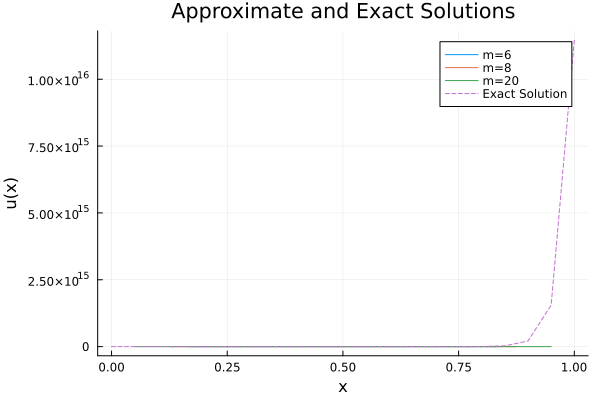

In [87]:
using LinearAlgebra
using Plots
using ToeplitzMatrices

# Define the function f(x)
func(x) = x

function create_system(m, c, d)
    h = 1.0 / m
    # Create the tridiagonal matrix A
    A = Tridiagonal(
        fill(-1/h^2, m-2),  # Lower diagonal
        fill(2/h^2 + d, m-1),  # Main diagonal
        fill(-1/h^2, m-2)  # Upper diagonal
    )
    
    # Adjust the off-diagonals for the term involving c
    for i in 1:m-2
        A[i, i+1] += c / (2h)
        A[i+1, i] += -c / (2h)
    end
    
    # Construct the right-hand side vector b
    b = [func(i*h) for i in 1:m-1]
    
    return A, b
end

# Create systems for different m
A_6, b_6 = create_system(6, 1, 2)
A_8, b_8 = create_system(8, 1, 2)
A_20, b_20 = create_system(20, 1, 2)

# Solve the systems
u_6 = A_6 \ b_6
u_8 = A_8 \ b_8
u_20 = A_20 \ b_20

# Create grid points for plotting
x_values_6 = [i / 6 for i in 0:6]
x_values_8 = [i / 8 for i in 0:8]
x_values_20 = [i / 20 for i in 0:20]

# Calculate the exact solution for comparison
C1 = (1 + exp(-1)) / (4 * (exp(2) - exp(-1)))  # Corrected exp function
C2 = -(1 + exp(-1)) / (4 * (exp(2) - exp(-1)))

# Define the exact solution function
exact_solution(x) = C1 * exp(2 * x) + C2 * exp(-x) + (1/2) * x - (1/4)

# Calculate exact values for plotting
exact_values = [exact_solution(x) for x in 0:20]

# Plotting
plot(x_values_6[2:end-1], u_6, label="m=6", legend=:topright, xlabel="x", ylabel="u(x)", title="Approximate and Exact Solutions")
plot!(x_values_8[2:end-1], u_8, label="m=8")
plot!(x_values_20[2:end-1], u_20, label="m=20")
plot!(x_values_20, exact_values, label="Exact Solution", linestyle=:dash)